<a href="https://colab.research.google.com/github/trighpro123/CNN_Nhandienkhuonmat/blob/main/NhanDienKhuonMat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
from __future__ import absolute_import, division, print_function, unicode_literals
import matplotlib.pylab as plt
import tensorflow as tf
import tensorflow_hub as hub
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import datasets,layers,models
import matplotlib.pyplot as plt
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense,Activation,Conv2D,MaxPooling2D,Flatten
from tensorflow.keras.optimizers import SGD,RMSprop,Adam

In [3]:
data_root='/content/drive/My Drive/File_anh_AI'

In [4]:
IMAGE_SHAPE = (150, 150)
TRAINING_DATA_DIR = str(data_root)
print(TRAINING_DATA_DIR);
datagen_kwargs = dict(rescale=1./255, validation_split=.20)
valid_datagen = tf.keras.preprocessing.image.ImageDataGenerator(**datagen_kwargs)
valid_generator = valid_datagen.flow_from_directory(
TRAINING_DATA_DIR,
subset="validation",
shuffle=True,
target_size=IMAGE_SHAPE
)
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(**datagen_kwargs)
train_generator = train_datagen.flow_from_directory(
TRAINING_DATA_DIR,
subset="training",
shuffle=True,
target_size=IMAGE_SHAPE)

/content/drive/My Drive/File_anh_AI
Found 18 images belonging to 3 classes.
Found 72 images belonging to 3 classes.


In [5]:
image_batch_train, label_batch_train = next(iter(train_generator))
print("Image batch shape: ", image_batch_train.shape)
print("Label batch shape: ", label_batch_train.shape)
dataset_labels = sorted(train_generator.class_indices.items(), key=lambda pair:pair[1])
dataset_labels = np.array([key.title() for key, value in dataset_labels])
print(dataset_labels)
print(train_generator.class_indices)

Image batch shape:  (32, 150, 150, 3)
Label batch shape:  (32, 3)
['Long' 'Thien' 'Tri']
{'Long': 0, 'Thien': 1, 'Tri': 2}


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 150, 150, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 75, 75, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 75, 75, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 37, 37, 64)       0         
 2D)                                                    

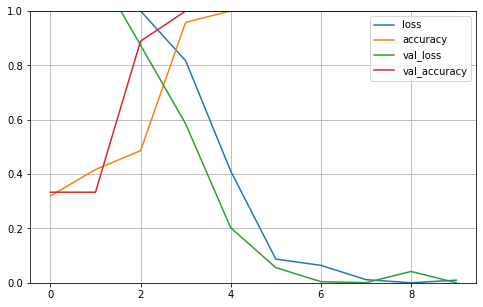

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:42: MatplotlibDeprecationWarning: Unrecognized location 'upperleft'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.


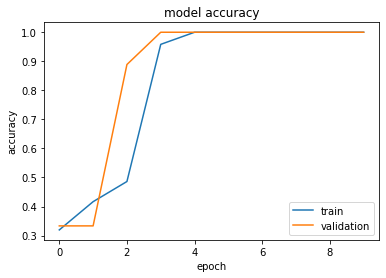

In [6]:

model=Sequential()
# BLock 1
model.add(Conv2D(32,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same',input_shape=(150,150,3))) # 32 phụ thuộc vào bội số byte
model.add(Conv2D(32,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same')) # padding same để kích thước trước giông skichs thước sau
model.add(MaxPooling2D((2,2)))
#Block 2
model.add(Conv2D(64,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same',input_shape=(150,150,3))) 
model.add(Conv2D(64,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2)))
#Block 3
model.add(Conv2D(128,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same',input_shape=(150,150,3))) 
model.add(Conv2D(128,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same')) 
model.add(MaxPooling2D((2,2)))

# #Tạo neurel model
model.add(Flatten())
model.add(Dense(512,activation='relu',kernel_initializer='he_uniform'))
model.add(Dense(128,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(3,activation='softmax'))
model.summary()

#Training
opt=SGD(learning_rate=0.01,momentum=0.9)
model.compile(loss='categorical_crossentropy',optimizer=Adam(),metrics=['accuracy'])

steps_per_epoch = np.ceil(train_generator.samples/train_generator.batch_size)
history=model.fit(train_generator,epochs=10,batch_size=2,validation_data=valid_generator,verbose=1)

# # Vẽ đồ thị bằng plt
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','validation'],loc='upperleft')
plt.show()

In [7]:
# Lưu model
model.save('CNN_Nhandienkhuonmat.h5')

Long


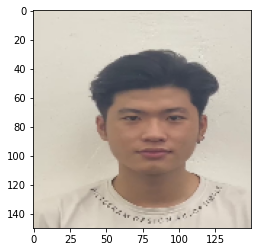

In [ ]:
#####    CODE nhận diện đánh giá model
import matplotlib.pyplot as plt
from tensorflow.keras import datasets,layers,models
from keras.preprocessing import image 
import numpy as np
# Load model lên sử dụng
# model500=models.load_model('CNN_Final.h5')

img=image.load_img('Long_29.bmp',target_size=(150,150)) # chuyển về độ phân giải mong muốn thành 32x32
plt.imshow(img)
img=image.img_to_array(img) # chuyển sang mảng array để reshape

img=img.reshape(1,150,150,3)
img=img.astype('float32')
img=img/255
doan=np.argmax(model.predict(img),axis=1)
if doan[0]==0:
  print("Long")
if doan[0]==1:
  print("Thien")
if doan[0]==2:
  print("Tri")

Tri


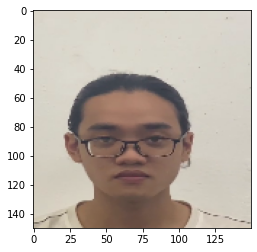

In [ ]:
#####    CODE nhận diện đánh giá model
import matplotlib.pyplot as plt
from tensorflow.keras import datasets,layers,models
from keras.preprocessing import image 
import numpy as np

img=image.load_img('Tri_48.bmp',target_size=(150,150)) # chuyển về độ phân giải mong muốn thành 32x32
plt.imshow(img)
img=image.img_to_array(img) # chuyển sang mảng array để reshape

img=img.reshape(1,150,150,3)
img=img.astype('float32')
img=img/255
doan=np.argmax(model.predict(img),axis=1)
if doan[0]==0:
  print("Long")
if doan[0]==1:
  print("Thien")
if doan[0]==2:
  print("Tri")

Thien


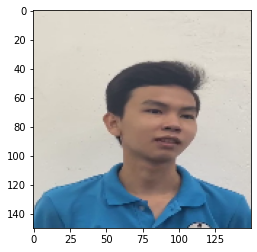

In [ ]:
#####    CODE nhận diện đánh giá model
import matplotlib.pyplot as plt
from tensorflow.keras import datasets,layers,models
from keras.preprocessing import image 
import numpy as np

img=image.load_img('Thien_50.bmp',target_size=(150,150)) # chuyển về độ phân giải mong muốn thành 32x32
plt.imshow(img)
img=image.img_to_array(img) # chuyển sang mảng array để reshape

img=img.reshape(1,150,150,3)
img=img.astype('float32')
img=img/255
doan=np.argmax(model.predict(img),axis=1)
if doan[0]==0:
  print("Long")
if doan[0]==1:
  print("Thien")
if doan[0]==2:
  print("Tri")